# **Importing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.model_selection import train_test_split, cross_val_score, GroupKFold, KFold ,StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder,PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import spearmanr
from scipy.sparse import hstack
from sklearn.impute import KNNImputer
import tensorflow as tf
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time
import pickle
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Loading Data**

In [4]:
df = pd.read_csv("GuestSatisfactionPredictionMilestone2.csv")
df.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,number_of_stays,first_review,last_review,guest_satisfaction,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,21514496,https://www.airbnb.com/rooms/21514496,PRIVATE BEDROOM DOWNTOWN 2 BED/ 2 BATH #5,Beautiful 2 bedroom 2 bathroom furnished apart...,Each apartment is fully furnished and consists...,Beautiful 2 bedroom 2 bathroom furnished apart...,NaN,***Note that the pictures on the website may o...,NaN,NaN,...,2,11/17/2017,11/17/2017,Average,f,f,f,strict_14_with_grace_period,f,f
1,990185,https://www.airbnb.com/rooms/990185,4 bed/2 ba Family Retreat in SD,We feel our house is a great place for a famil...,Our house is ideal for large families or group...,We feel our house is a great place for a famil...,Neighborhood Mira Mesa is a culturally diverse...,NaN,NaN,Our guests may use the BBQ grill.,...,26,8/2/2013,7/31/2019,High,f,f,f,moderate,f,f
2,19878244,https://www.airbnb.com/rooms/19878244,San Diego Dream Villa,"Zen, Luxury and the Best Location in Americas ...","San Diego Dream Villa, this unique and luxurio...","Zen, Luxury and the Best Location in Americas ...",This amazing house is located within a few min...,Im always available to make your trip experien...,"If you are bringing your car, remember that SD...",A couple of days before your arrival you will ...,...,170,7/23/2017,7/16/2019,Very High,f,f,f,strict_14_with_grace_period,f,f
3,24561458,https://www.airbnb.com/rooms/24561458,Studio with Piazza View in Downtown Little Italy,Start the day with breakfast on the sunny pati...,"Newly built, this beautiful studio is located ...",Start the day with breakfast on the sunny pati...,"Spend the day at the zoo in Balboa Park, or ex...",The apartment is located on the Piazza Della F...,"MTS, Train, and Trolly are close by. The airpo...",You will not be sharing the apartment with any...,...,212,5/1/2018,8/3/2019,Very High,f,t,f,moderate,f,f
4,32269829,https://www.airbnb.com/rooms/32269829,Beachside Retreat w/ Private Rooftop Deck w/ V...,This is a 2 bedroom/1 bathroom beachside unit...,Beach living at its finest! The highlight of ...,This is a 2 bedroom/1 bathroom beachside unit...,Mission Beach is an amazing coastal community ...,NaN,The Boardwalk and Bayside Walk are wonderful w...,This is a private home that is part of a typic...,...,2,6/30/2019,6/30/2019,Very High,f,t,f,strict_14_with_grace_period,f,f


# **BASIC CLEAN**

In [5]:
Y = df['guest_satisfaction']
X = df.drop(columns=['guest_satisfaction'])


In [6]:
drop_columns = ['thumbnail_url', 'host_acceptance_rate','square_feet','is_business_travel_ready','requires_license','id','country_code','summary',
                'host_url','listing_url','name','neighbourhood','street','host_has_profile_pic','country','smart_location','market','state','city',
                'bed_type','require_guest_phone_verification','require_guest_profile_picture', 'host_name', 'space','host_total_listings_count',
                'latitude', 'longitude']
X.drop(columns=drop_columns, inplace=True)

In [7]:
X['extra_people'] = X['extra_people'].replace(r'[\$,]', '', regex=True).astype(float)
X['nightly_price'] = X['nightly_price'].replace(r'[\$,]', '', regex=True).astype(float)
X['price_per_stay'] = X['price_per_stay'].replace(r'[\$,]', '', regex=True).astype(float)
X['security_deposit'] = X['security_deposit'].replace(r'[\$,]', '', regex=True).astype(float)
X['cleaning_fee'] = X['cleaning_fee'].replace(r'[\$,]', '', regex=True).astype(float)
X['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
X['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
X['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

# **PreProcessing**

In [8]:
def parse_amenities(amenities_str):
    amenities_str = amenities_str.strip('{}')
    items = [item.strip().strip('"') for item in amenities_str.split(',')]
    return items

X['amenities_parsed'] = X['amenities'].apply(parse_amenities)

amenity_categories = {
    'Basic Necessities': {'Heating', 'Hot water', 'Smoke detector', 'Carbon monoxide detector'},
    'Comfort/Convenience': {'Air conditioning', 'Kitchen', 'Iron', 'Laptop friendly workspace', 'Essentials', 'Hangers'},
    'Technology': {'TV', 'Wifi'},
    'Safety': {'Smoke detector', 'Carbon monoxide detector', 'Lock on bedroom door'},
    'Recreation': {'Pool', 'Gym', 'Hot tub'},
    'Parking': {'Free parking on premises'},
    'Accessibility': {'Elevator', 'Private entrance'}
}

def categorize_amenities(amenities_list):
    categorized = {category: [] for category in amenity_categories}
    for amenity in amenities_list:
        for category, items in amenity_categories.items():
            if amenity in items:
                categorized[category].append(amenity)
    return categorized

X['amenities_categorized'] = X['amenities_parsed'].apply(categorize_amenities)


def create_binary_features(amenities_list):
    binary_features = {}
    all_amenities = set(amenities_list)
    for category, items in amenity_categories.items():
        for item in items:
            binary_features[f'has_{item.lower().replace(" ", "_")}'] = 1 if item in all_amenities else 0
    return binary_features

binary_features_X = X['amenities_parsed'].apply(create_binary_features).apply(pd.Series)


X = X.join(binary_features_X)

X = X.drop(columns=[col for col in ['amenities', 'amenities_parsed', 'amenities_categorized'] if col in X.columns])

print(X.columns)

Index(['description', 'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'host_id', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'zipcode',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'nightly_price', 'price_per_stay',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_stays', 'first_review', 'last_review', 'instant_bookable',
       'cancellation_policy', 'has_carbon_monoxide_detector',
       'has_smoke_detector', 'has_heating', 'has_hot_water', 'has_essentials',
       'has_air_conditioning', 'has_kitchen', 'has_iron', 'has_hangers',
       'has_laptop_friendly_workspace', 'has_wifi', 'h

In [9]:
def get_text_columns(X, sample_ratio=0.3, min_avg_len=5, min_unique=3):
    text_columns = []

    for col in X.columns:
        sample = X[col].dropna().sample(frac=min(sample_ratio, 1.0), random_state=42)

        is_text = sample.apply(lambda x: isinstance(x, str) and not x.isnumeric()).mean() > 0.8
        avg_len = sample.apply(lambda x: len(x) if isinstance(x, str) else 0).mean()
        num_unique = X[col].nunique()

        if is_text and avg_len > min_avg_len and num_unique >= min_unique:
            text_columns.append(col)

    return text_columns


text_columns = get_text_columns(X)
print("Text columns in the DataFrame:", text_columns)

Text columns in the DataFrame: ['description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_location', 'host_about', 'host_response_time', 'host_neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'cancellation_policy']


In [10]:
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    if not isinstance(text, str):
        return ""

    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    # tokenize with 'english' language
    tokens = word_tokenize(text, language='english')
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

text_columns.remove('host_response_time')
for col in text_columns:
    X[col] = X[col].apply(preprocess_text)

print(X.columns)

Index(['description', 'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'host_id', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'zipcode',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'nightly_price', 'price_per_stay',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_stays', 'first_review', 'last_review', 'instant_bookable',
       'cancellation_policy', 'has_carbon_monoxide_detector',
       'has_smoke_detector', 'has_heating', 'has_hot_water', 'has_essentials',
       'has_air_conditioning', 'has_kitchen', 'has_iron', 'has_hangers',
       'has_laptop_friendly_workspace', 'has_wifi', 'h

# **Train & Test Split**

In [11]:
X_train, X_test, y_train , y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **VISUALIZATIONS**

In [12]:
def get_numeric_columns(X, sample_ratio=0.3):
    numeric_columns = []

    for col in X.columns:
        sample = X[col].dropna().sample(frac=min(sample_ratio, 1.0), random_state=42)

        is_numeric = sample.apply(lambda x: isinstance(x, (int, float))).mean() > 0.8

        if is_numeric:
            numeric_columns.append(col)

    return numeric_columns
def get_categorical_columns(X_train, sample_ratio=0.3, max_unique=2):
    categorical_columns = []

    for col in X_train.columns:
        sample = X[col].dropna().sample(frac=min(sample_ratio, 1.0), random_state=42)

        if sample.nunique() <= max_unique:
            categorical_columns.append(col)

    return categorical_columns
Numerical_cols = get_numeric_columns(X)
Categorical_cols = get_categorical_columns(X)
print("Numerical columns:", Numerical_cols)
print('///////////////////////////////////////////////////////////////////')
#Categorical_cols = [ 'is_location_exact', 'host_identity_verified','host_is_superhost','host_response_rate','instant_bookable' ]
print("categorical columns:", Categorical_cols)


Numerical columns: ['host_id', 'host_listings_count', 'zipcode', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'nightly_price', 'price_per_stay', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'number_of_stays', 'has_carbon_monoxide_detector', 'has_smoke_detector', 'has_heating', 'has_hot_water', 'has_essentials', 'has_air_conditioning', 'has_kitchen', 'has_iron', 'has_hangers', 'has_laptop_friendly_workspace', 'has_wifi', 'has_tv', 'has_lock_on_bedroom_door', 'has_pool', 'has_gym', 'has_hot_tub', 'has_free_parking_on_premises', 'has_elevator', 'has_private_entrance']
///////////////////////////////////////////////////////////////////
categorical columns: ['host_is_superhost', 'host_identity_verified', 'is_location_exact', 'instant_bookable', 'has_carbon_monoxide_detector', 'has_smoke_detector', 'has_heating', 'has_hot_water', 'has_essentials', 'has_air_conditioning', 'has_kitchen', 'has_iron', 'has_han

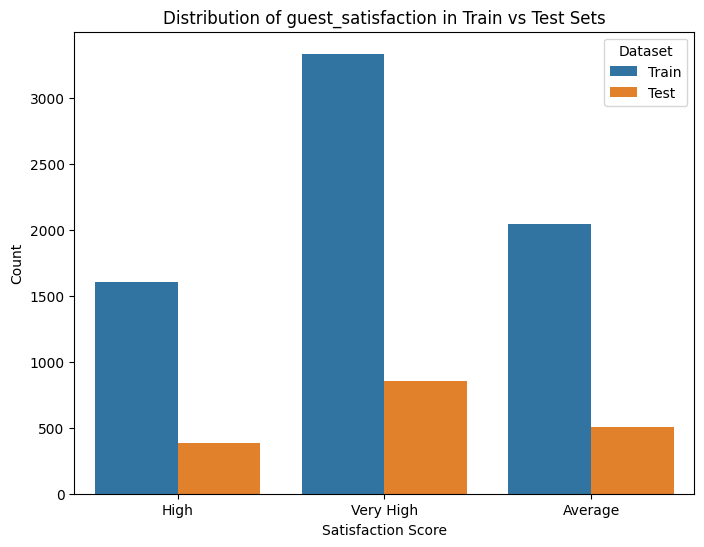

In [13]:
# Combine train and test for comparison
train_data = X_train.copy()
train_data['Set'] = 'Train'
train_data['guest_satisfaction'] = y_train

test_data = X_test.copy()
test_data['Set'] = 'Test'
test_data['guest_satisfaction'] = y_test

combined = pd.concat([train_data, test_data])

plt.figure(figsize=(8,6))
sns.countplot(data=combined, x='guest_satisfaction', hue='Set')
plt.title('Distribution of guest_satisfaction in Train vs Test Sets')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Dataset')
plt.show()

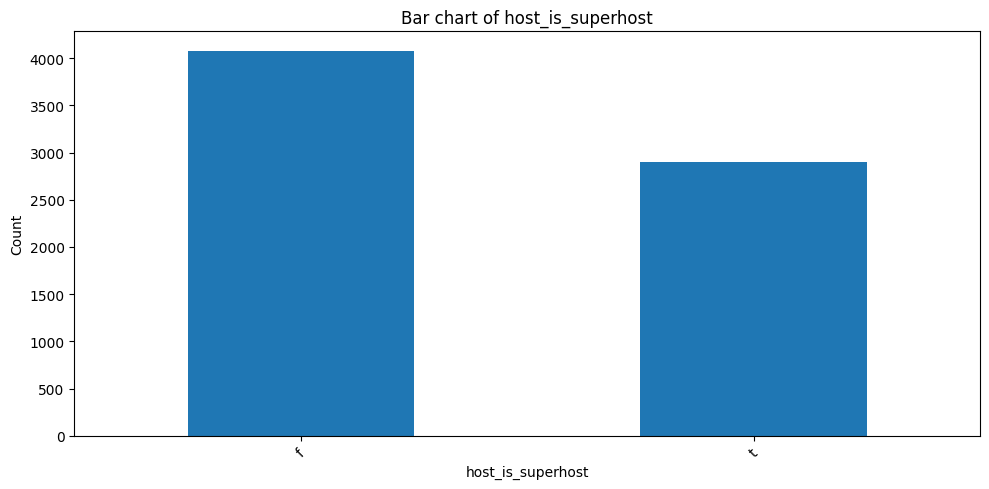

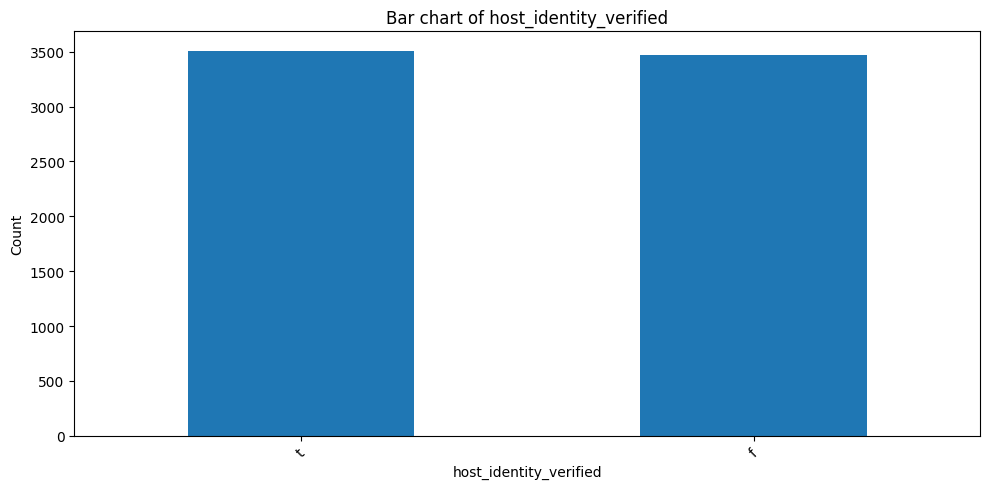

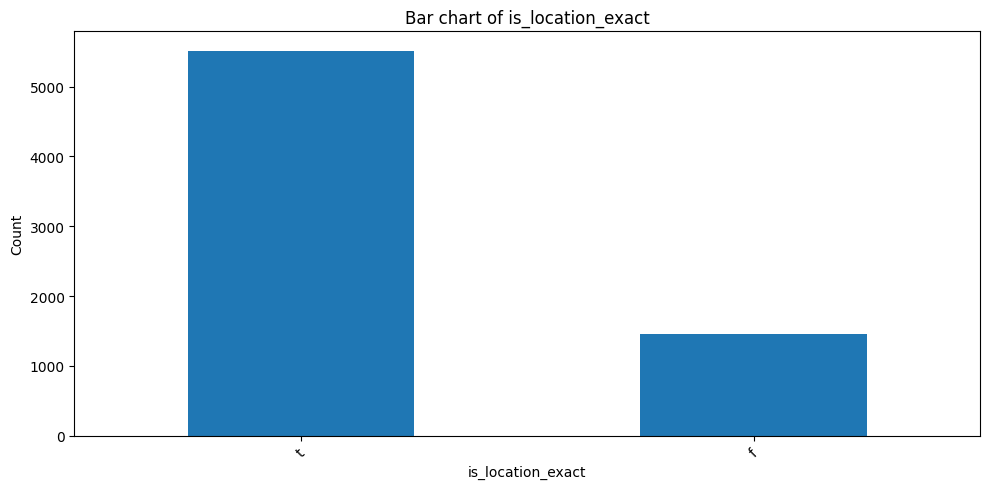

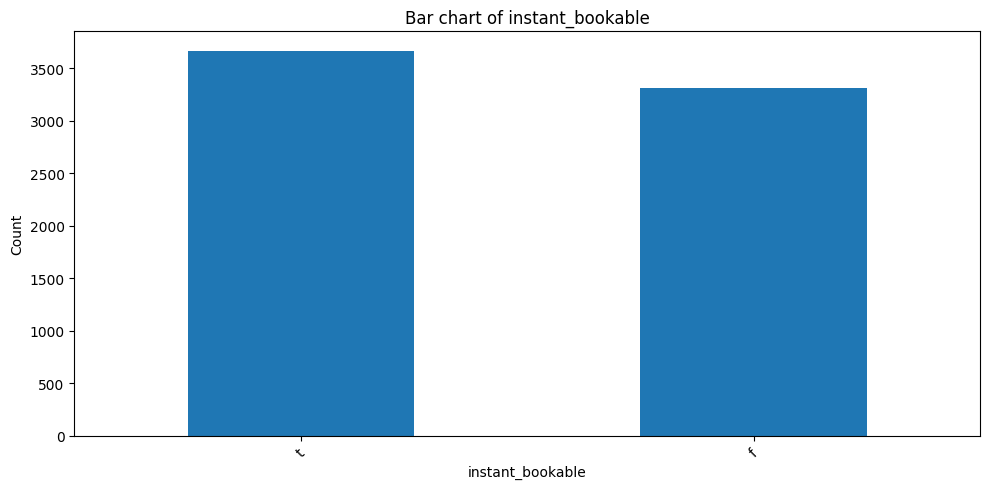

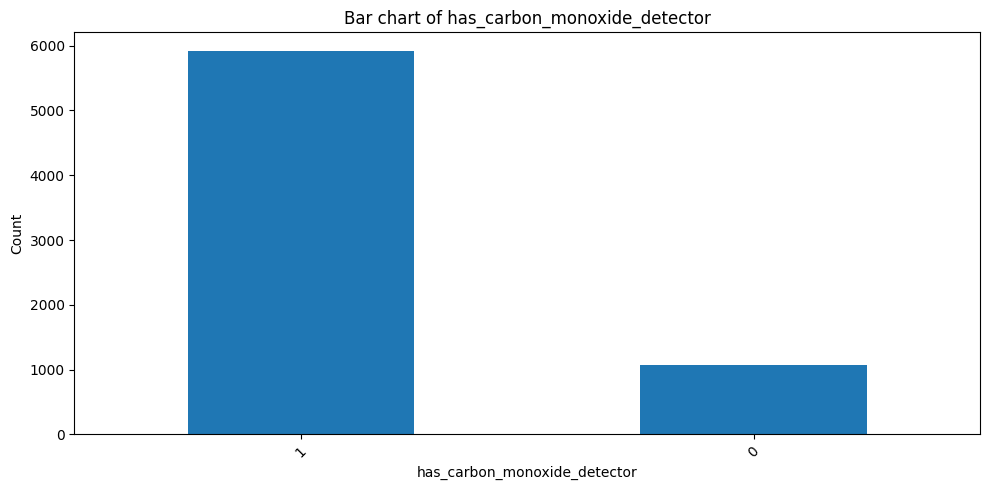

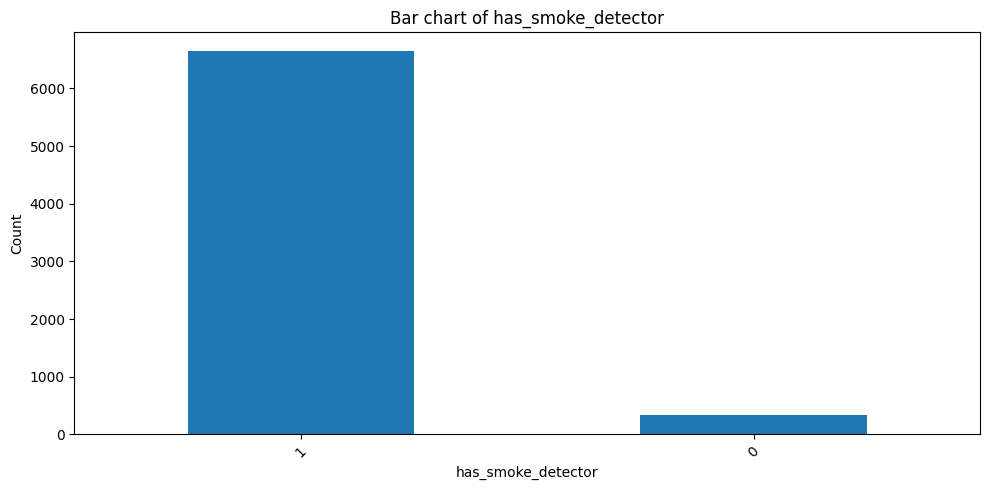

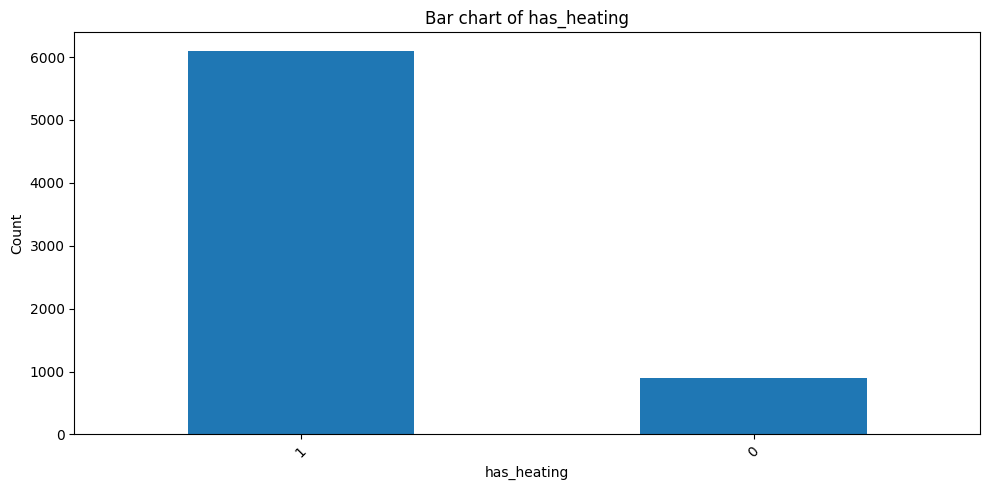

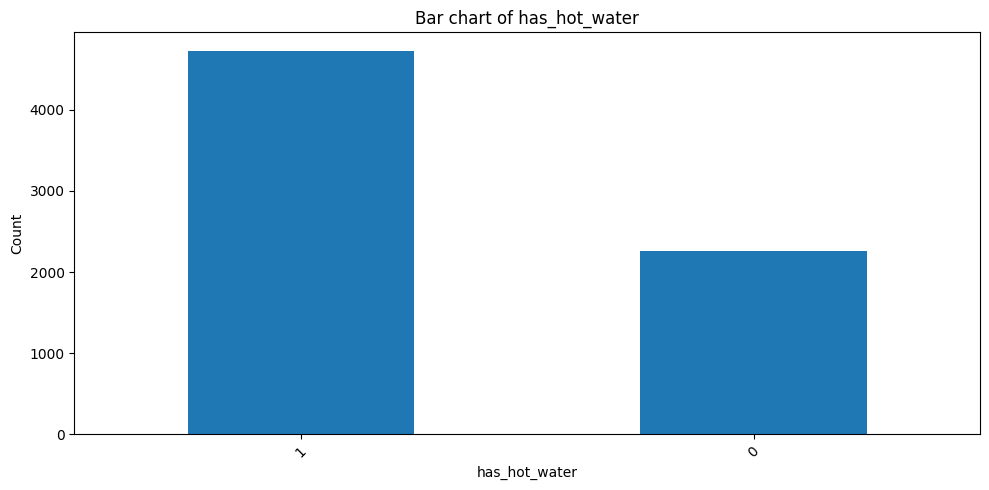

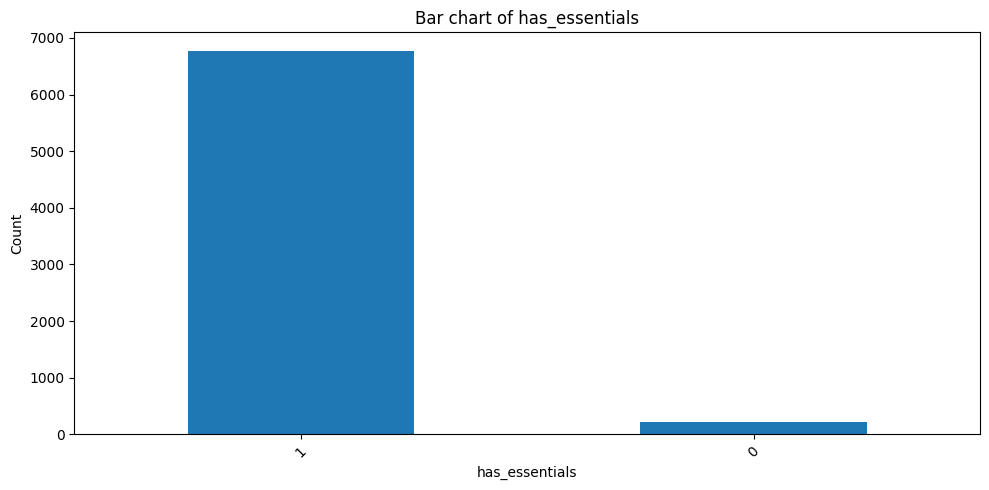

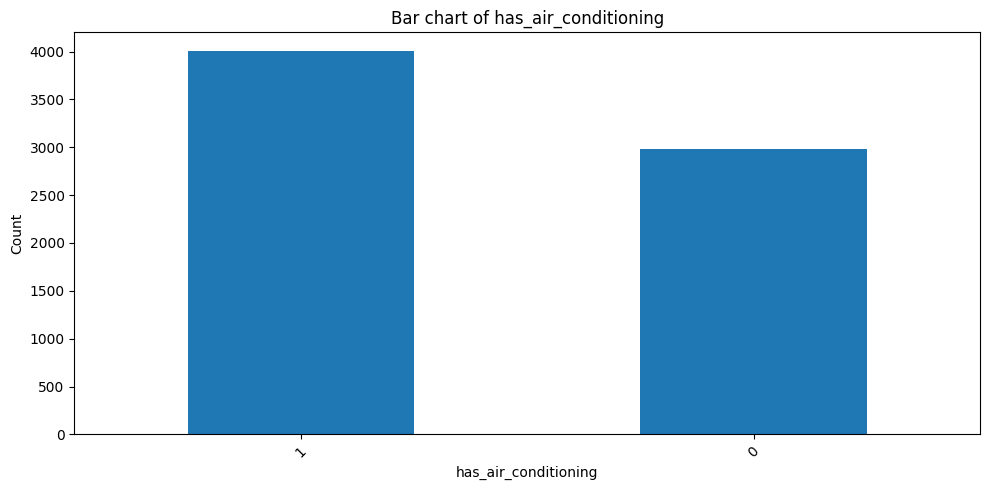

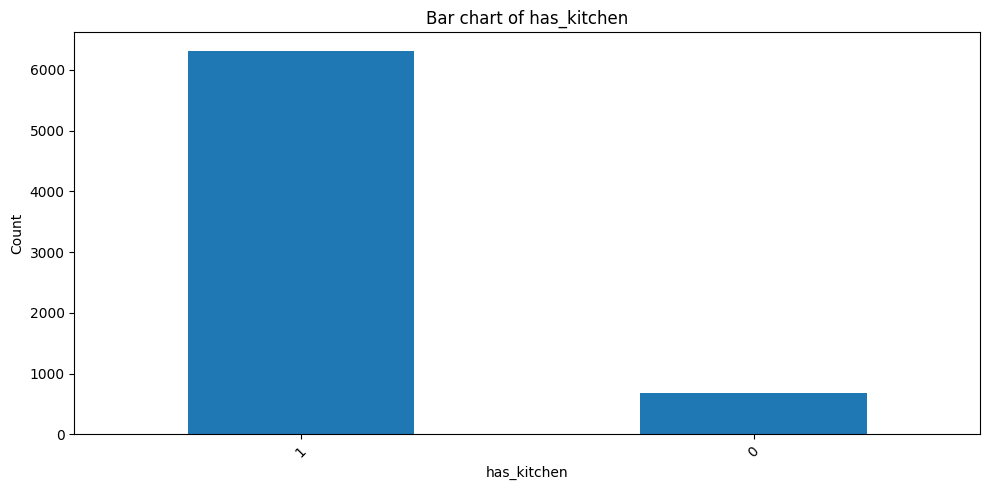

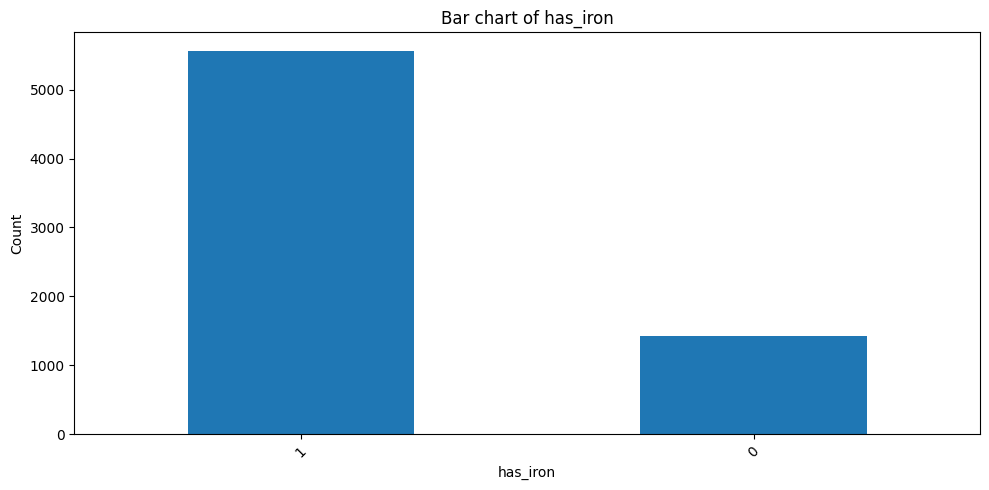

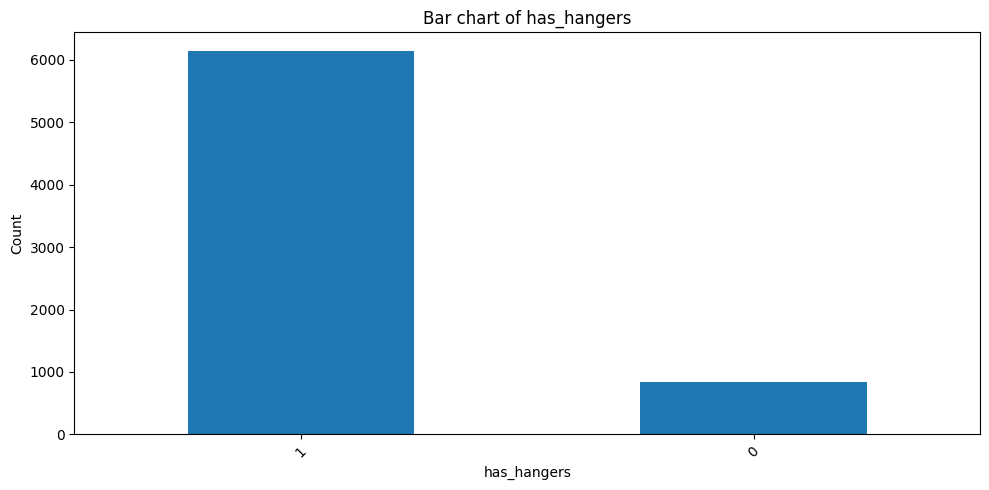

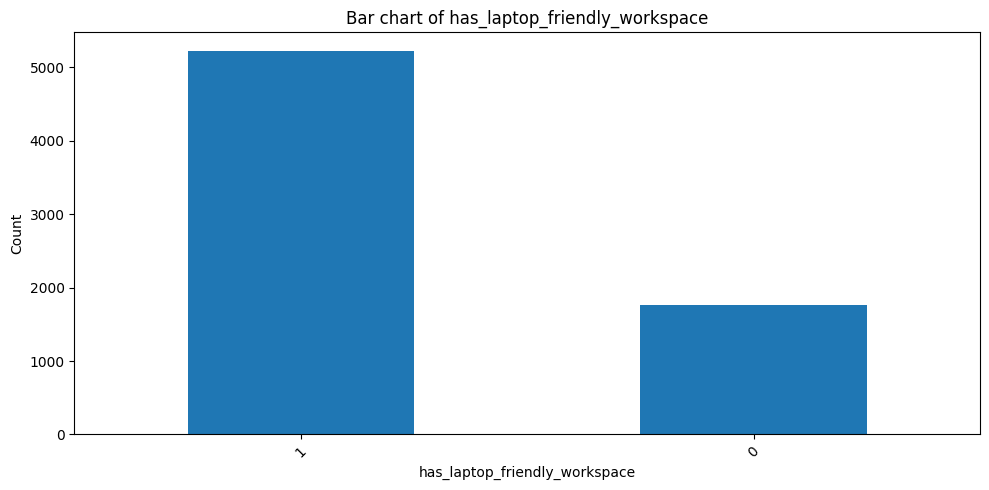

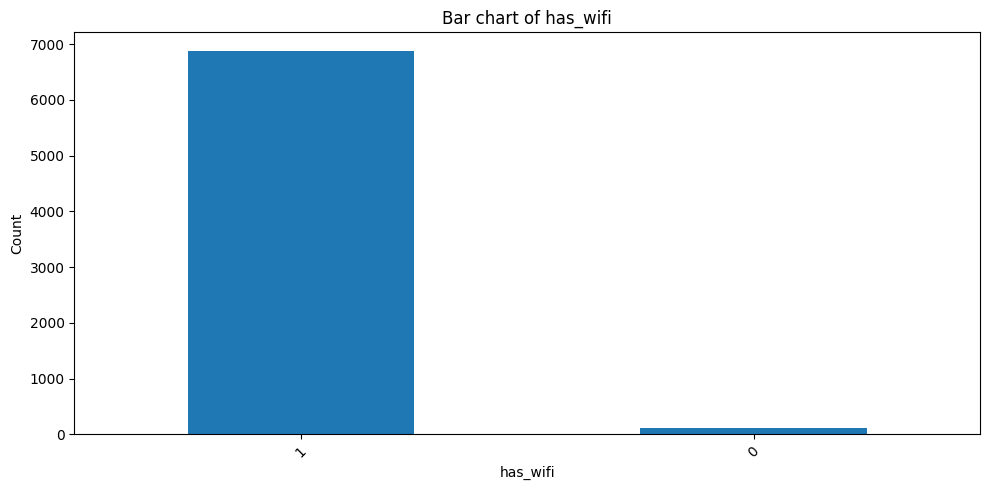

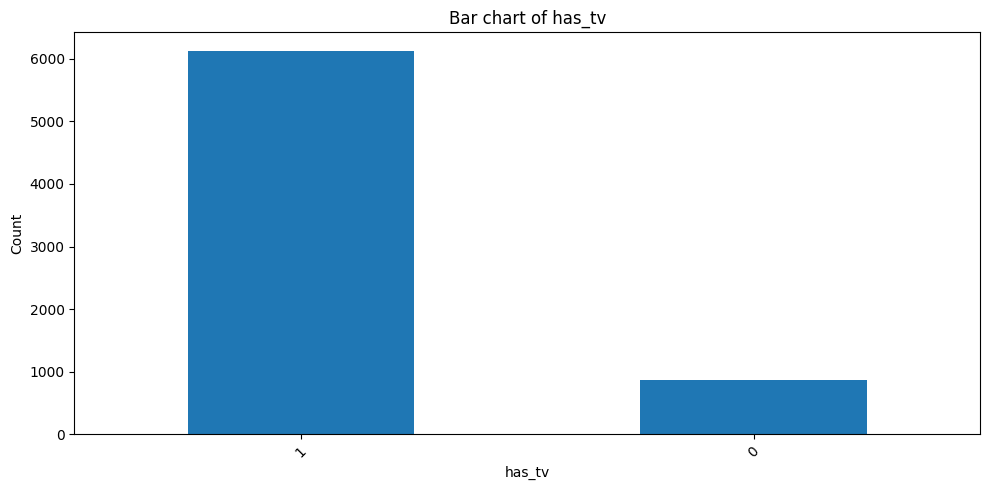

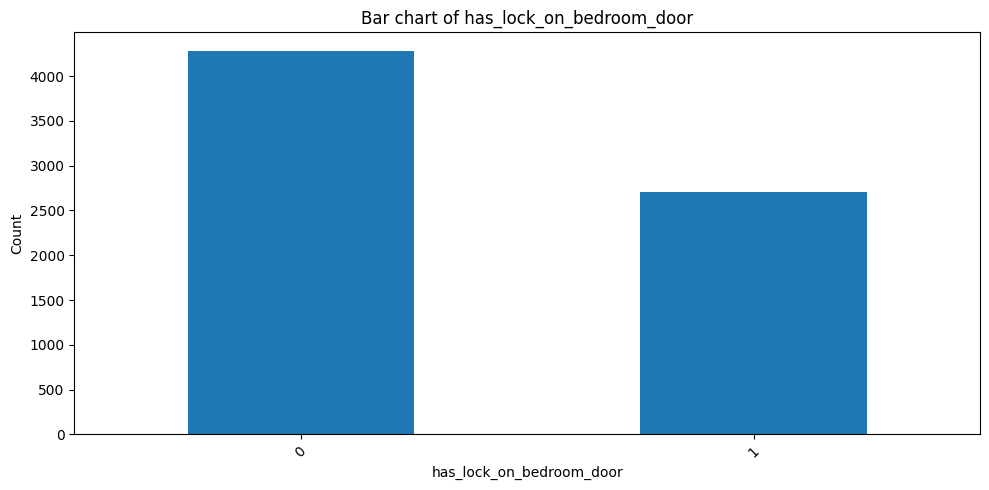

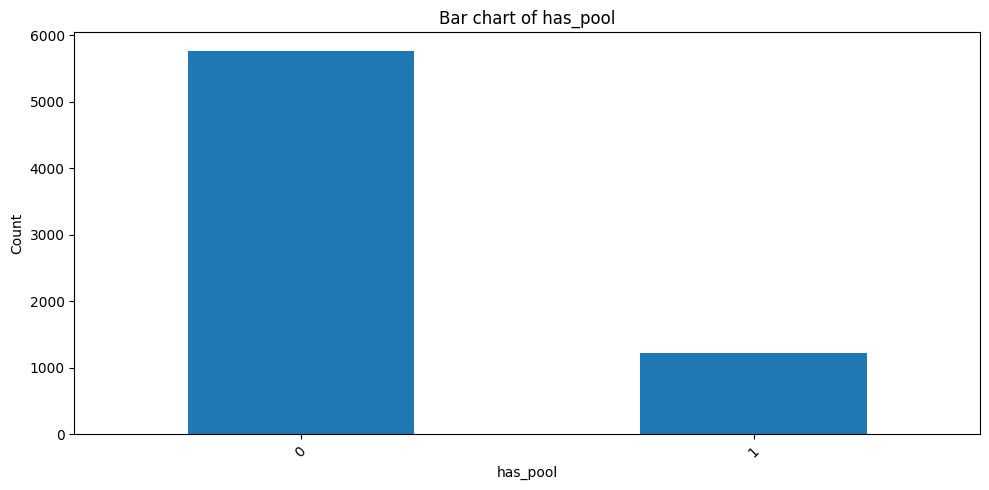

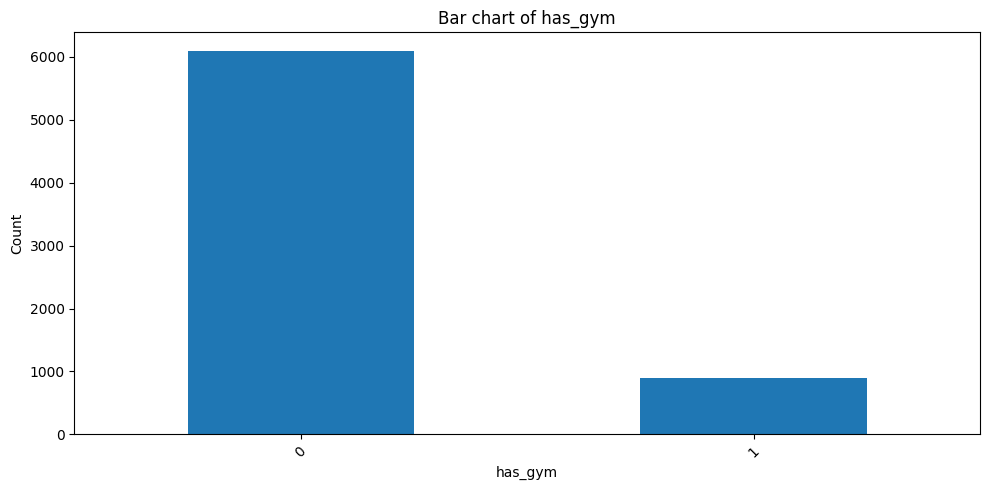

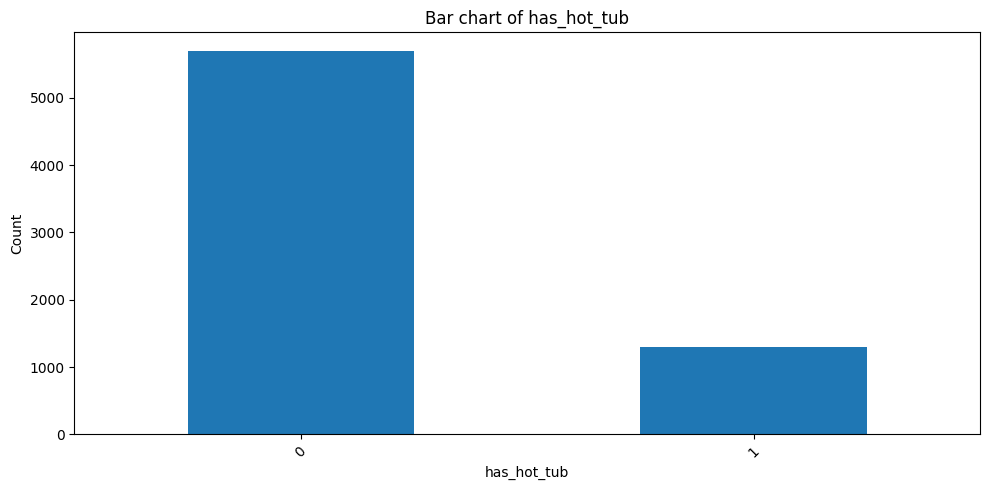

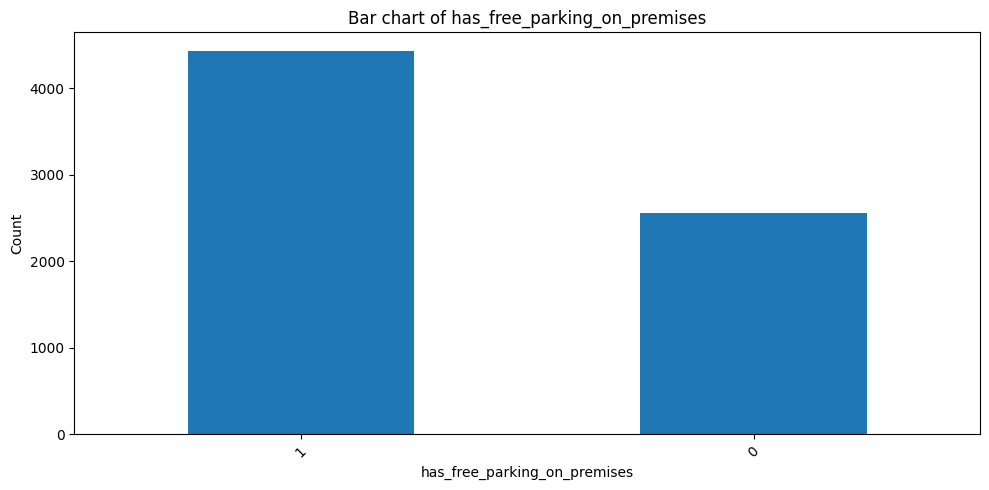

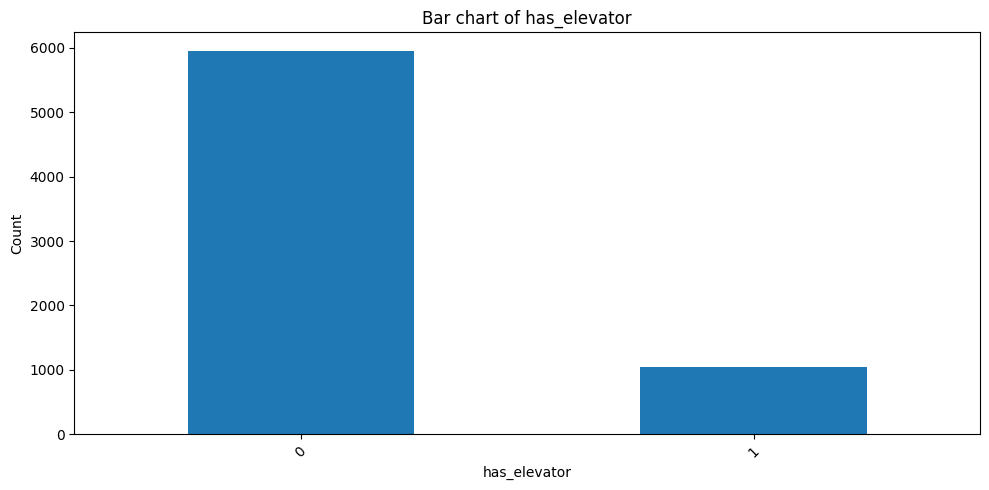

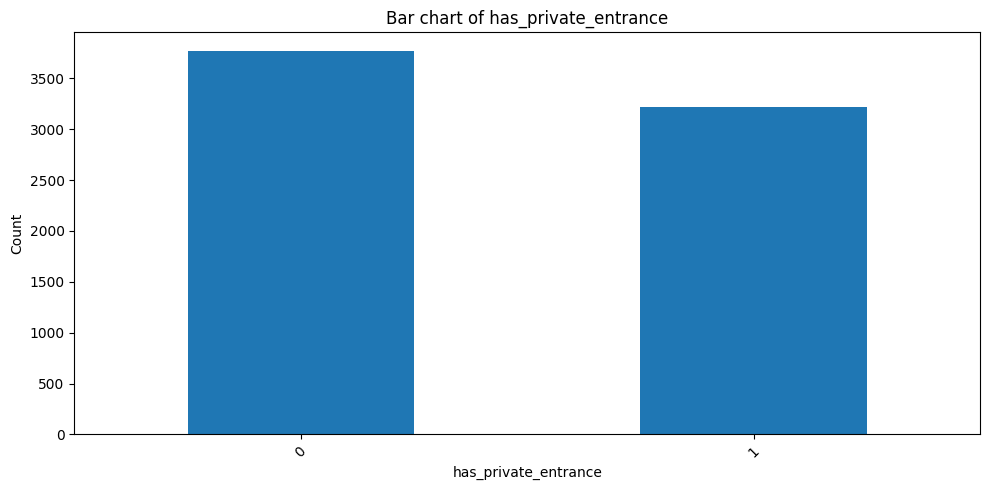

In [14]:
def plot_feature_vs_target(X_train, categorical_cols, target='guest_satisfaction'):
    for col in categorical_cols:
        if col in X_train.columns:
            if X_train[col].nunique() > 0:
                plt.figure(figsize=(10, 5))
                X_train[col].value_counts().head(10).plot(kind='bar')  # top 10 categories
                plt.title(f'Bar chart of {col}')
                plt.xlabel(col)
                plt.ylabel('Count')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
            else:
                print(f"Skipping '{col}' due to no unique values to plot.")
        else:
            print(f"Column '{col}' not found in the DataFrame.")

plot_feature_vs_target(X_train, Categorical_cols)

## **Handling Outliers**

In [15]:
def handle_outliers_iqr(df, numerical_cols, method='cap'):
    for col in numerical_cols:
        # Ensure the column is numeric before calculating quantiles
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            if method == 'remove':
                df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            elif method == 'cap':
                df[col] = np.where(df[col] < lower_bound, lower_bound,
                          np.where(df[col] > upper_bound, upper_bound, df[col]))
        else:
            print(f"Warning: Skipping non-numeric column '{col}' for outlier handling.")
    return df
X_train = handle_outliers_iqr(X_train, Numerical_cols, method='cap')

# **FILL MISSING VALUES**

In [16]:
columns = ['description', 'transit', 'access', 'interaction', 'house_rules']
X_train[columns] = X_train[columns].fillna('No information provided')

In [17]:
categorical_cols = ['host_location', 'host_is_superhost', 'host_identity_verified']
for col in categorical_cols:
    mode_value = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(mode_value)

In [18]:
X_train['host_neighbourhood'] = X_train.groupby('neighbourhood_cleansed')['host_neighbourhood'] \
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else X_train['host_neighbourhood'].mode()[0]))

X_train['host_neighbourhood'] = X_train['host_neighbourhood'].fillna(X_train['host_neighbourhood'].mode()[0])

X_train['host_response_time'] = X_train.groupby(['host_is_superhost', 'host_response_rate'])['host_response_time'] \
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else X_train['host_response_time'].mode()[0]))

X_train['host_response_time'] = X_train['host_response_time'].fillna(X_train['host_response_time'].mode()[0])

X_train['neighborhood_overview'] = X_train.groupby('neighbourhood_cleansed')['neighborhood_overview'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "No overview available")
)

X_train['neighborhood_overview'] = X_train['neighborhood_overview'].fillna(X_train['neighborhood_overview'].mode()[0])

In [19]:
X_train['host_about'] = X_train.apply(
    lambda row: (
        "is a host offering a {row['room_type']} in {row['neighbourhood_cleansed']}. "
        f"Guests usually enjoy a {row['property_type']} with great hospitality."
        if pd.isnull(row['host_about']) else row['host_about']
    ), axis=1
)

X_train['notes'] = X_train.apply(
    lambda row: (
        f"This {row['room_type']} in {row['neighbourhood_cleansed']} offers a comfortable stay. "
        f"Arrival instructions and local tips will be shared after booking."
        if pd.isnull(row['notes']) else row['notes']
    ), axis=1
)

In [20]:
# Safely strip '%' and convert to float
X_train['host_response_rate'] = X_train['host_response_rate'].astype(str).str.rstrip('%')
X_train['host_response_rate'] = pd.to_numeric(X_train['host_response_rate'], errors='coerce')
X_train['host_response_rate'] = X_train['host_response_rate'].fillna(X_train['host_response_rate'].median())

In [21]:
X_train['zipcode'] = X_train['zipcode'].astype(str).str.extract(r'(\d{5})')[0]

# Define numeric columns
numeric_cols_median = ['zipcode', 'bathrooms', 'bedrooms', 'beds', 'host_listings_count']

# Convert each column to numeric
for col in numeric_cols_median:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

# Fill NA with median
for col in numeric_cols_median:
    median_val = X_train[col].median()
    X_train[col] = X_train[col].fillna(median_val)

In [22]:
# Optional numeric financials
X_train['security_deposit'] = X_train['security_deposit'].fillna(0)
X_train['cleaning_fee'] = X_train['cleaning_fee'].fillna(0)

In [23]:
if 'neighbourhood' in X_train.columns:
    X_train.drop('neighbourhood', axis=1, inplace=True)


# Build the summary table
summary = pd.DataFrame({
    'Feature': X_train.columns,
    'Data Type': X_train.dtypes.values,
    'Missing Values': X_train.isnull().sum().values
})

# sort by number of missing values
summary = summary.sort_values(by='Missing Values', ascending=False).reset_index(drop=True)

pd.set_option('display.max_rows', None)
print(summary)

                          Feature       Data Type  Missing Values
0                      host_since  datetime64[ns]               1
1           neighborhood_overview          object               0
2                     description          object               0
3                           notes          object               0
4                         transit          object               0
5                     interaction          object               0
6                          access          object               0
7                     house_rules          object               0
8                         host_id         float64               0
9                   host_location          object               0
10                     host_about          object               0
11             host_response_time          object               0
12             host_response_rate         float64               0
13              host_is_superhost          object               0
14        

# **Feature Engineering**

In [24]:
X['review_duration_days'] = (X['last_review'] - X['first_review']).dt.days
X['review_duration_months'] = X['review_duration_days'] / 30
zero_month_count = (X['review_duration_months'] == 0).sum()
total_rows = len(X)
percentage_zero_months = (zero_month_count / total_rows) * 100

print(f"Percentage of zero-month durations: {percentage_zero_months:.2f}%") #hnemla al 8% dool b eh??
print(X[['first_review', 'last_review', 'review_duration_months', 'review_duration_days']].head())
print(X['review_duration_months'].max())
print(X['review_duration_days'].max())

Percentage of zero-month durations: 7.77%
  first_review last_review  review_duration_months  review_duration_days
0   2017-11-17  2017-11-17                0.000000                     0
1   2013-08-02  2019-07-31               72.966667                  2189
2   2017-07-23  2019-07-16               24.100000                   723
3   2018-05-01  2019-08-03               15.300000                   459
4   2019-06-30  2019-06-30                0.000000                     0
129.53333333333333
3886


In [25]:
X['host_since'] = pd.to_datetime(X['host_since'], errors='coerce')
X['host_duration_days'] = (pd.to_datetime("today") - X['host_since']).dt.days
X['host_duration_months'] = X['host_duration_days'] / 30
X['host_duration_years'] = X['host_duration_days'] / 365.25
print(X[['host_since', 'host_duration_days', 'host_duration_months', 'host_duration_years']].head())
print(X['host_duration_days'].max())
print(X['host_duration_months'].max())
print(X['host_duration_years'].max())
#7asa al years ansab 7aga

  host_since  host_duration_days  host_duration_months  host_duration_years
0 2012-10-15              4598.0            153.266667            12.588638
1 2013-01-29              4492.0            149.733333            12.298426
2 2013-11-05              4212.0            140.400000            11.531828
3 2018-04-11              2594.0             86.466667             7.101985
4 2013-08-23              4286.0            142.866667            11.734428
6285.0
209.5
17.207392197125255


In [26]:
oldest_host_date = X['host_since'].min()
X['host_relative_age_days'] = (X['host_since'] - oldest_host_date).dt.days
X['host_relative_age_months'] = X['host_relative_age_days'] / 30
X['host_relative_age_years'] = X['host_relative_age_days'] / 365.25
print(X[['host_since', 'host_relative_age_days', 'host_relative_age_months', 'host_relative_age_years']].head())
zero_month_count = (X['host_relative_age_days'] == 0).sum()
total_rows = len(X)
percentage_zero_months = (zero_month_count / total_rows) * 100
print(X['host_relative_age_days'].max())
print(X['host_relative_age_months'].max())
print(X['host_relative_age_years'].max())
print(f"Percentage of zero-month durations relative host: {percentage_zero_months:.2f}%")#percentage msh kbeera f eshta
#years ansab 7aga bardoo

  host_since  host_relative_age_days  host_relative_age_months  \
0 2012-10-15                  1687.0                 56.233333   
1 2013-01-29                  1793.0                 59.766667   
2 2013-11-05                  2073.0                 69.100000   
3 2018-04-11                  3691.0                123.033333   
4 2013-08-23                  1999.0                 66.633333   

   host_relative_age_years  
0                 4.618754  
1                 4.908966  
2                 5.675565  
3                10.105407  
4                 5.472964  
4176.0
139.2
11.433264887063656
Percentage of zero-month durations relative host: 0.01%


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8724 entries, 0 to 8723
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   description                    8724 non-null   object        
 1   neighborhood_overview          8724 non-null   object        
 2   notes                          8724 non-null   object        
 3   transit                        8724 non-null   object        
 4   access                         8724 non-null   object        
 5   interaction                    8724 non-null   object        
 6   house_rules                    8724 non-null   object        
 7   host_id                        8724 non-null   int64         
 8   host_since                     8723 non-null   datetime64[ns]
 9   host_location                  8724 non-null   object        
 10  host_about                     8724 non-null   object        
 11  host_response_tim

In [28]:
# Drop the original date columns from X after creating the new duration/age features
drop_columns = ['first_review', 'last_review', 'host_since']
# Check if columns exist
existing_drop_columns = [col for col in drop_columns if col in X.columns]
if existing_drop_columns:
    X.drop(columns=existing_drop_columns, inplace=True)
else:
    print("Date columns already dropped from X or do not exist.")

In [29]:
# Host Features
X['host_response_rate'] = X['host_response_rate'].str.rstrip('%').astype(float)
X['host_response_power'] = X['host_response_rate'] * np.log1p(X['host_listings_count'])
X['host_commitment'] = X['host_duration_days'] / (X['number_of_stays'] + 1)


In [30]:
# Property Quality Indicators
X['bedroom_quality'] = X['bedrooms'] / (X['bathrooms'] + 0.5)
X['space_per_guest'] = X['accommodates'] / (X['beds'] + 0.1)

In [31]:
#Features related to time
X['seasonal_demand'] = np.sin(2 * np.pi * (X['host_duration_days'] % 365) / 365)
X['recent_review_boost'] = np.where(X['review_duration_days'] < 30, 1, 0.5)

In [32]:
#Amenity Combinations
X['essential_amenities'] = X[['has_wifi', 'has_air_conditioning', 'has_kitchen']].sum(axis=1)
X['luxury_amenities'] = X[['has_hot_tub', 'has_pool', 'has_gym']].sum(axis=1)

In [33]:
# Feature to evaluate value for money
X['price_value'] = X['nightly_price'] / X['accommodates']

# **Feature selection**

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8724 entries, 0 to 8723
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   description                    8724 non-null   object 
 1   neighborhood_overview          8724 non-null   object 
 2   notes                          8724 non-null   object 
 3   transit                        8724 non-null   object 
 4   access                         8724 non-null   object 
 5   interaction                    8724 non-null   object 
 6   house_rules                    8724 non-null   object 
 7   host_id                        8724 non-null   int64  
 8   host_location                  8724 non-null   object 
 9   host_about                     8724 non-null   object 
 10  host_response_time             7667 non-null   object 
 11  host_response_rate             7667 non-null   float64
 12  host_is_superhost              8723 non-null   o

In [35]:
df['guest_satisfaction']

,guest_satisfaction
0,Average
1,High
2,Very High
3,Very High
4,Very High
5,High
6,Very High
7,Very High
8,Average
9,Average


In [36]:
df['guest_satisfaction'].value_counts()

,count
guest_satisfaction,
Very High,4188
Average,2546
High,1990


In [37]:
#feature selection by Chi-square(categorical features)
features = X_train.copy()
target = y_train.copy()

# select categorical columns
categorical_cols = features.select_dtypes(include='object').columns.tolist()

# One-hot encode categorical columns
X_cat = pd.get_dummies(features[categorical_cols])

le = LabelEncoder()
y_encoded = le.fit_transform(target)

selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X_cat, y_encoded)

scores = selector.scores_
feature_names = X_cat.columns

selected_features = pd.DataFrame({'Feature': feature_names, 'Chi2 Score': scores})
selected_features = selected_features.sort_values(by='Chi2 Score', ascending=False)

# select top 10 features
top_n = 10
top_features = selected_features.head(top_n)
print(top_features)

                                                 Feature  Chi2 Score
33933                                host_is_superhost_t  522.077488
33932                                host_is_superhost_f  370.737702
33545  host_about_since 2002 providing ever improving...   80.167880
26887  house_rules_1 priority insuring valued guest e...   80.167880
34213                            property_type_apartment   77.648156
34249                       cancellation_policy_moderate   61.522700
34248                       cancellation_policy_flexible   58.767361
34132                neighbourhood_cleansed_east village   57.461002
32765               host_about_living dream one day time   53.153206
14557                                           transit_   49.889942


In [38]:
def get_original_column(dummy_col, original_cols):
    matches = [col for col in original_cols if dummy_col.startswith(col)]
    if matches:
        # Return the longest matching original column name
        return max(matches, key=len)
    else:
        return dummy_col

original_cols = [get_original_column(col, categorical_cols) for col in top_features['Feature']]
original_cols = sorted(set(original_cols))

print("\nSelected original categorical column names:")
print(original_cols)


Selected original categorical column names:
['cancellation_policy', 'host_about', 'host_is_superhost', 'house_rules', 'neighbourhood_cleansed', 'property_type', 'transit']


In [39]:
#feature selection by anova(numerical features)
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train_clean = X_train[numerical_cols].copy()
X_train_clean = X_train_clean.apply(pd.to_numeric, errors='coerce')

for col in numerical_cols:
    if X_train_clean[col].isna().any():
        median_val = X_train_clean[col].median()
        X_train_clean[col] = X_train_clean[col].fillna(median_val)

# remove constant features
constant_features = [col for col in numerical_cols if X_train_clean[col].nunique() == 1]
if constant_features:
    print(f"Removed constant features: {constant_features}")
    numerical_cols = numerical_cols.drop(constant_features)
    X_train_clean = X_train_clean.drop(columns=constant_features)

if len(numerical_cols) > 0:
    F_values, p_values = f_classif(X_train_clean, y_train)

    full_results = pd.DataFrame({
        'Feature': numerical_cols,
        'F-Statistic': F_values,
        'p-value': p_values
    }).sort_values(by='F-Statistic', ascending=False)

    print("\nANOVA Results for All Features:")
    print(full_results.to_string(index=False))

    top_10 = full_results.head(10)
    print("\nTop 10 Features by F-Statistic:")
    print(top_10.to_string(index=False))

    significant_features = full_results[full_results['p-value'] < 0.05]
    if not significant_features.empty:
        print("\nTop 10 Statistically Significant Features (p-value < 0.05):")
        print(significant_features.head(10).to_string(index=False))
    else:
        print("\nNo features with statistically significant ANOVA results (p-value < 0.05)")
else:
    print("No valid numerical features available for ANOVA after preprocessing")

Removed constant features: ['has_carbon_monoxide_detector', 'has_smoke_detector', 'has_heating', 'has_essentials', 'has_kitchen', 'has_iron', 'has_hangers', 'has_wifi', 'has_tv', 'has_pool', 'has_gym', 'has_hot_tub', 'has_elevator']

ANOVA Results for All Features:
                      Feature  F-Statistic      p-value
          host_listings_count   213.169657 1.381469e-90
              number_of_stays   187.171005 6.586422e-80
            number_of_reviews   187.171005 6.586422e-80
     has_lock_on_bedroom_door    47.295093 3.962876e-21
                has_hot_water    40.421315 3.517102e-18
               maximum_nights    35.472927 4.700179e-16
               minimum_nights    32.787720 6.714050e-15
has_laptop_friendly_workspace    29.120424 2.544845e-13
                 accommodates    25.648950 7.971844e-12
         has_air_conditioning    24.052887 3.888807e-11
                         beds    22.026148 2.912342e-10
                 cleaning_fee    16.692535 5.858898e-08
      

# **ENCODING**

In [40]:
X_train = X_train.replace({
    'require_guest_phone_verification': {'t': 1, 'f': 0},
    'require_guest_profile_picture': {'t': 1, 'f': 0},
    'instant_bookable': {'t': 1, 'f': 0},
    'is_location_exact': {'t': 1, 'f': 0},
    'host_identity_verified': {'t': 1, 'f': 0},
    'host_has_profile_pic': {'t': 1, 'f': 0},
    'is_business_travel_ready': {'t': 1, 'f': 0},
    'host_is_superhost': {'t': 1, 'f': 0},
    'requires_license': {'t': 1, 'f': 0}
})
X_test = X_test.replace({
    'require_guest_phone_verification': {'t': 1, 'f': 0},
    'require_guest_profile_picture': {'t': 1, 'f': 0},
    'instant_bookable': {'t': 1, 'f': 0},
    'is_location_exact': {'t': 1, 'f': 0},
    'host_identity_verified': {'t': 1, 'f': 0},
    'host_has_profile_pic': {'t': 1, 'f': 0},
    'is_business_travel_ready': {'t': 1, 'f': 0},
    'host_is_superhost': {'t': 1, 'f': 0},
    'requires_license': {'t': 1, 'f': 0}
})


In [41]:
label_cols = [
    'cancellation_policy',
    'room_type',
    'property_type',
    'host_identity_verified',
]

encoders = {}

for col in label_cols:
    le = LabelEncoder()
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

    all_values = pd.concat([X_train[col], X_test[col]]).unique()
    le.fit(all_values)

    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    encoders[col] = le

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [42]:
mapping = {
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4
}

X_train['host_response_time'] = X_train['host_response_time'].map(mapping)
X_test['host_response_time'] = X_test['host_response_time'].map(mapping)

In [43]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

with open('y_label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [44]:
preprocessed_train = X_train.join(y_train)
preprocessed_test = X_test.join(y_test)

preprocessed_train.to_csv('preprocessed_train.csv')
preprocessed_test.to_csv('preprocessed_test.csv')

In [45]:
for df in [X_train, X_test]:
    for col in df.columns:
        if df[col].dtype == object and df[col].str.contains('%').any():
            df[col] = df[col].str.replace('%', '', regex=False).astype(float)

# select columns
num_cols = X_train.select_dtypes(include='number').columns.tolist()
binary_cols = [c for c in num_cols if X_train[c].nunique() == 2]
cont_cols = [c for c in num_cols if c not in binary_cols]
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

# pipelines
binary_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

continuous_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor
preprocessor = ColumnTransformer([
    ('bin', binary_transformer, binary_cols),
    ('cont', continuous_transformer, cont_cols),
    ('cat', categorical_transformer, cat_cols)
])


# **Classification Models**


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6979 entries, 5312 to 7270
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   description                    6979 non-null   object        
 1   neighborhood_overview          6979 non-null   object        
 2   notes                          6979 non-null   object        
 3   transit                        6979 non-null   object        
 4   access                         6979 non-null   object        
 5   interaction                    6979 non-null   object        
 6   house_rules                    6979 non-null   object        
 7   host_id                        6979 non-null   float64       
 8   host_since                     6978 non-null   datetime64[ns]
 9   host_location                  6979 non-null   object        
 10  host_about                     6979 non-null   object        
 11  host_response_time 

In [51]:
# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Feature definitions
numeric_features = [
    'host_response_rate', 'host_is_superhost', 'accommodates',
    'bathrooms', 'bedrooms', 'beds', 'nightly_price',
    'cleaning_fee', 'number_of_reviews', 'minimum_nights',
    'host_listings_count', 'number_of_stays', 'security_deposit',
    'extra_people', 'maximum_nights', 'guests_included'
]

categorical_features = [
    'neighbourhood_cleansed', 'instant_bookable',
    'cancellation_policy', 'property_type', 'room_type'
]

amenity_features = [
    'has_wifi', 'has_air_conditioning', 'has_kitchen',
    'has_heating', 'has_tv', 'has_free_parking_on_premises',
    'has_iron', 'has_laptop_friendly_workspace'
]

# Verify features exist in X_train
missing_features = []
for feature in numeric_features + categorical_features + amenity_features:
    if feature not in X_train.columns:
        missing_features.append(feature)

if missing_features:
    print(f"Warning: These features are missing from your DataFrame and will be skipped: {missing_features}")
    numeric_features = [f for f in numeric_features if f in X_train.columns]
    categorical_features = [f for f in categorical_features if f in X_train.columns]
    amenity_features = [f for f in amenity_features if f in X_train.columns]

# Preprocessor with Imputer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('amenities', 'passthrough', amenity_features)
    ])

# Define models with hyperparameter grids
models = {
    "Random Forest": {
        "model": RandomForestClassifier,
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5, 10]
        },
        "base_params": {"random_state": 42}
    },
    "XGBoost": {
        "model": XGBClassifier,
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [3, 6, 9],
            "learning_rate": [0.01, 0.1, 0.3]
        },
        "base_params": {"random_state": 42, "eval_metric": "mlogloss"}
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier,
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.3]
        },
        "base_params": {"random_state": 42}
    },
    "Logistic Regression": {
        "model": LogisticRegression,
        "params": {
            "C": [0.1, 1.0, 10.0],
            "max_iter": [100, 200, 300],
            "solver": ["lbfgs", "liblinear", "saga"]
        },
        "base_params": {"random_state": 42, "multi_class": "multinomial"}
    },
    "SVM": {
        "model": SVC,
        "params": {
            "C": [0.1, 1.0, 10.0],
            "kernel": ["linear", "rbf", "poly"],
            "gamma": ["scale", "auto", 0.1]
        },
        "base_params": {"random_state": 42, "probability": True}
    },
    "KNN": {
        "model": KNeighborsClassifier,
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
            "p": [1, 2, 3]
        },
        "base_params": {}
    }
}

# Train and evaluate models with hyperparameter tuning and cross-validation
results = {}
training_times = {}
test_times = {}
best_params = {}

for name, model_info in models.items():
    print(f"\nTraining {name}...")
    model_class = model_info["model"]
    param_grid = model_info["params"]
    base_params = model_info["base_params"]

    best_accuracy = 0
    best_model = None
    best_param_set = {}

    # Iterate over each hyperparameter
    for param_name, param_values in param_grid.items():
        for value in param_values:
            # Fix other hyperparameters to default values
            current_params = base_params.copy()
            current_params[param_name] = value

            try:
                # Initialize model with current parameters
                model = model_class(**current_params)

                # Create pipeline
                pipeline = Pipeline([
                    ('preprocessor', preprocessor),
                    ('classifier', model)
                ])

                # Time training
                start_train = time.time()
                pipeline.fit(X_train, y_train_encoded)
                training_time = time.time() - start_train

                # Compute training accuracy
                y_train_pred_encoded = pipeline.predict(X_train)
                y_train_pred_labels = le.inverse_transform(y_train_pred_encoded)
                y_train_labels = le.inverse_transform(y_train_encoded)
                train_acc = accuracy_score(y_train_labels, y_train_pred_labels)

                # Compute cross-validation accuracy (5-fold)
                cv_scores = cross_val_score(pipeline, X_train, y_train_encoded, cv=5, scoring='accuracy')
                cv_acc = np.mean(cv_scores)

                # Time testing
                start_test = time.time()
                y_pred_encoded = pipeline.predict(X_test)
                test_time = time.time() - start_test

                # Decode test predictions
                y_pred_labels = le.inverse_transform(y_pred_encoded)
                y_test_labels = le.inverse_transform(y_test_encoded)

                # Calculate test accuracy
                test_acc = accuracy_score(y_test_labels, y_pred_labels)

                # Store results if best for this model (based on test accuracy)
                if test_acc > best_accuracy:
                    best_accuracy = test_acc
                    best_model = pipeline
                    best_param_set = current_params

                # Store results
                results.setdefault(name, []).append({
                    'params': {param_name: value},
                    'train_accuracy': train_acc,
                    'cv_accuracy': cv_acc,
                    'test_accuracy': test_acc,
                    'training_time': training_time,
                    'test_time': test_time,
                    'classification_report': classification_report(
                        y_test_labels, y_pred_labels,
                        target_names=['average', 'high', 'very high']
                    )
                })

                print(f"{name} with {param_name}={value}:")
                print(f"  Training Accuracy: {train_acc:.4f}")
                print(f"  Cross-Validation Accuracy: {cv_acc:.4f}")
                print(f"  Test Accuracy: {test_acc:.4f}")
                print(f"  Training Time: {training_time:.2f}s")
                print(f"  Test Time: {test_time:.2f}s")
                print("-" * 60)

            except Exception as e:
                print(f"Error with {name} ({param_name}={value}): {str(e)}")
                continue

    # Store best parameters and times
    if best_model is not None:
        best_params[name] = best_param_set
        training_times[name] = min([r['training_time'] for r in results[name]])
        test_times[name] = min([r['test_time'] for r in results[name]])

# Print best model and accuracy
if results:
    best_model_name = max(
        [(name, max([r['test_accuracy'] for r in results[name]])) for name in results],
        key=lambda x: x[1]
    )[0]
    best_accuracy = max([r['test_accuracy'] for r in results[best_model_name]])
    best_param_set = best_params[best_model_name]

    print("\n" + "="*60)
    print(f"Best Model: {best_model_name}")
    print(f"Best Test Accuracy: {best_accuracy:.4f}")
    print(f"Best Parameters: {best_param_set}")
    print("="*60)
else:
    print("\nNo models were successfully trained. Please check the feature selection.")


Training Random Forest...
Random Forest with n_estimators=100:
  Training Accuracy: 0.9990
  Cross-Validation Accuracy: 0.5922
  Test Accuracy: 0.6115
  Training Time: 7.45s
  Test Time: 0.07s
------------------------------------------------------------
Random Forest with n_estimators=200:
  Training Accuracy: 0.9990
  Cross-Validation Accuracy: 0.5936
  Test Accuracy: 0.6120
  Training Time: 14.15s
  Test Time: 0.13s
------------------------------------------------------------
Random Forest with n_estimators=300:
  Training Accuracy: 0.9990
  Cross-Validation Accuracy: 0.5958
  Test Accuracy: 0.6080
  Training Time: 20.88s
  Test Time: 0.26s
------------------------------------------------------------
Random Forest with max_depth=10:
  Training Accuracy: 0.6752
  Cross-Validation Accuracy: 0.5925
  Test Accuracy: 0.6034
  Training Time: 2.19s
  Test Time: 0.05s
------------------------------------------------------------
Random Forest with max_depth=20:
  Training Accuracy: 0.9943
  

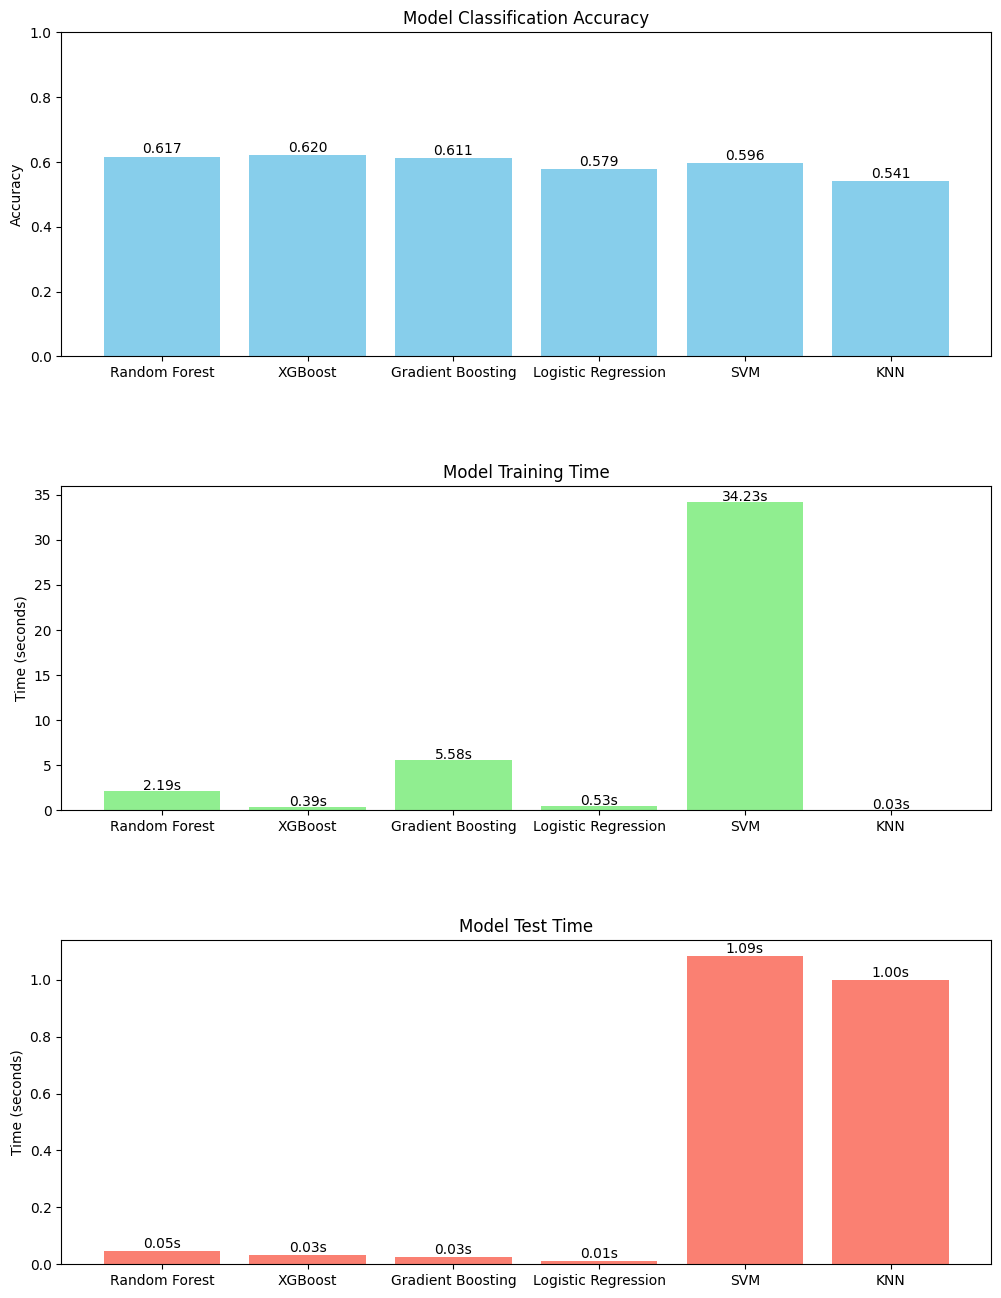

In [52]:
import matplotlib.pyplot as plt

# Prepare plot data: Use best test accuracy, and min training/testing time per model
model_names = list(results.keys())
best_test_accuracies = [max([entry['test_accuracy'] for entry in results[model]]) for model in model_names]
min_training_times = [min([entry['training_time'] for entry in results[model]]) for model in model_names]
min_test_times = [min([entry['test_time'] for entry in results[model]]) for model in model_names]

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 16))
plt.subplots_adjust(hspace=0.4)

# Accuracy plot
axes[0].bar(model_names, best_test_accuracies, color='skyblue')
axes[0].set_title('Model Classification Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)
for i, v in enumerate(best_test_accuracies):
    axes[0].text(i, v + 0.01, f"{v:.3f}", ha='center')

# Training time plot
axes[1].bar(model_names, min_training_times, color='lightgreen')
axes[1].set_title('Model Training Time')
axes[1].set_ylabel('Time (seconds)')
for i, v in enumerate(min_training_times):
    axes[1].text(i, v + 0.1, f"{v:.2f}s", ha='center')

# Test time plot
axes[2].bar(model_names, min_test_times, color='salmon')
axes[2].set_title('Model Test Time')
axes[2].set_ylabel('Time (seconds)')
for i, v in enumerate(min_test_times):
    axes[2].text(i, v + 0.01, f"{v:.2f}s", ha='center')

plt.show()


In [53]:
# Print best accuracy
if results:
    best_model_entry = max(
        (entry for model_entries in results.values() for entry in model_entries),
        key=lambda x: x['test_accuracy']
    )

    # Search the result was from which model
    for model_name, model_entries in results.items():
        if best_model_entry in model_entries:
            best_model_name = model_name
            break

    best_accuracy = best_model_entry['test_accuracy']
    print("\n" + "="*60)
    print(f"Best Model: {best_model_name} with accuracy: {best_accuracy:.4f}")
    print("="*60)
else:
    print("\nNo models were successfully trained. Please check the feature selection.")

# Save the XGBoost pipeline
import pickle
if 'XGBoost' in results:
    xgb_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(
            random_state=42,
            eval_metric='mlogloss',
            learning_rate=0.1,

        ))
    ])

    xgb_pipeline.fit(X_train, y_train_encoded)

    with open('xgboost_pipeline.pickle', 'wb') as f:
        pickle.dump(xgb_pipeline, f)

    print("\nXGBoost pipeline saved to 'xgboost_pipeline.pickle'")


Best Model: XGBoost with accuracy: 0.6201

XGBoost pipeline saved to 'xgboost_pipeline.pickle'
To load in test script:
with open('xgboost_pipeline.pickle', 'rb') as f:
    pipeline = pickle.load(f)
Label encoder saved to 'label_encoder.pickle'


In [54]:
# Summary table
from sklearn.metrics import classification_report
import pandas as pd

summary_table = []

for model_name, entries in results.items():
    best_entry = max(entries, key=lambda x: x['test_accuracy'])
    report = best_entry['classification_report']
    lines = report.split('\n')
    for line in lines:
        if line.strip().startswith('average'):
            avg_metrics = line.strip().split()
            break

    summary_table.append({
        'Model': model_name,
        'Best Params': best_params[model_name],
        'Test Accuracy': best_entry['test_accuracy'],
        'Precision': float(avg_metrics[1]),
        'Recall': float(avg_metrics[2]),
        'F1-Score': float(avg_metrics[3]),
        'Training Time (s)': best_entry['training_time'],
        'Test Time (s)': best_entry['test_time']
    })

# Summary DataFrame
summary_df = pd.DataFrame(summary_table)
summary_df = summary_df.sort_values(by='Test Accuracy', ascending=False)
pd.set_option('display.max_colwidth', None)
display(summary_df)


,Model,Best Params,Test Accuracy,Precision,Recall,F1-Score,Training Time (s),Test Time (s)
1,XGBoost,"{'random_state': 42, 'eval_metric': 'mlogloss', 'learning_rate': 0.1}",0.620057,0.59,0.60,0.60,0.792304,0.040415
0,Random Forest,"{'random_state': 42, 'min_samples_split': 10}",0.616619,0.59,0.53,0.56,4.144069,0.084064
2,Gradient Boosting,"{'random_state': 42, 'max_depth': 5}",0.611461,0.56,0.59,0.58,11.526561,0.052852
4,SVM,"{'random_state': 42, 'probability': True, 'C': 1.0}",0.595989,0.65,0.41,0.51,34.240748,1.455883
3,Logistic Regression,"{'random_state': 42, 'multi_class': 'multinomial', 'max_iter': 200}",0.578797,0.55,0.63,0.59,1.150031,0.018742
5,KNN,{'p': 1},0.540974,0.51,0.57,0.54,0.036845,1.621672
